"""
本文件功能说明：
- Phase 5: 交互式仪表板
- 生成3主题仪表板（数据概览、分类模型性能、channels聚类analysis）
- Generate 5-phase core insights visualizationsummary

"""

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure font for proper display
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("All libraries imported successfully")

All libraries imported successfully


In [4]:
# Load raw and engineered feature data
print("Loading data...")
df_raw = pd.read_csv('engineered_features_raw.csv')
df_scaled = pd.read_csv('engineered_features_scaled.csv')

print(f"Data loaded successfully")
print(f"   • Sample count: {df_raw.shape[0]:,}")
print(f"   • Feature count: {df_raw.shape[1]}")
print(f"   • Date range: {df_raw['published_date'].min()} ~ {df_raw['published_date'].max()}")
print(f"   • Unique channels: {df_raw['channel_name'].nunique():,}")



Loading data...
Data loaded successfully
   • Sample count: 155,669
   • Feature count: 68
   • Date range: 2006-11-06 11:22:08+00:00 ~ 2025-10-20 12:08:16+00:00
   • Unique channels: 15,863


# Part 1: Interactive Dashboards 🎨

## 1.1 Overall Overview Dashboard

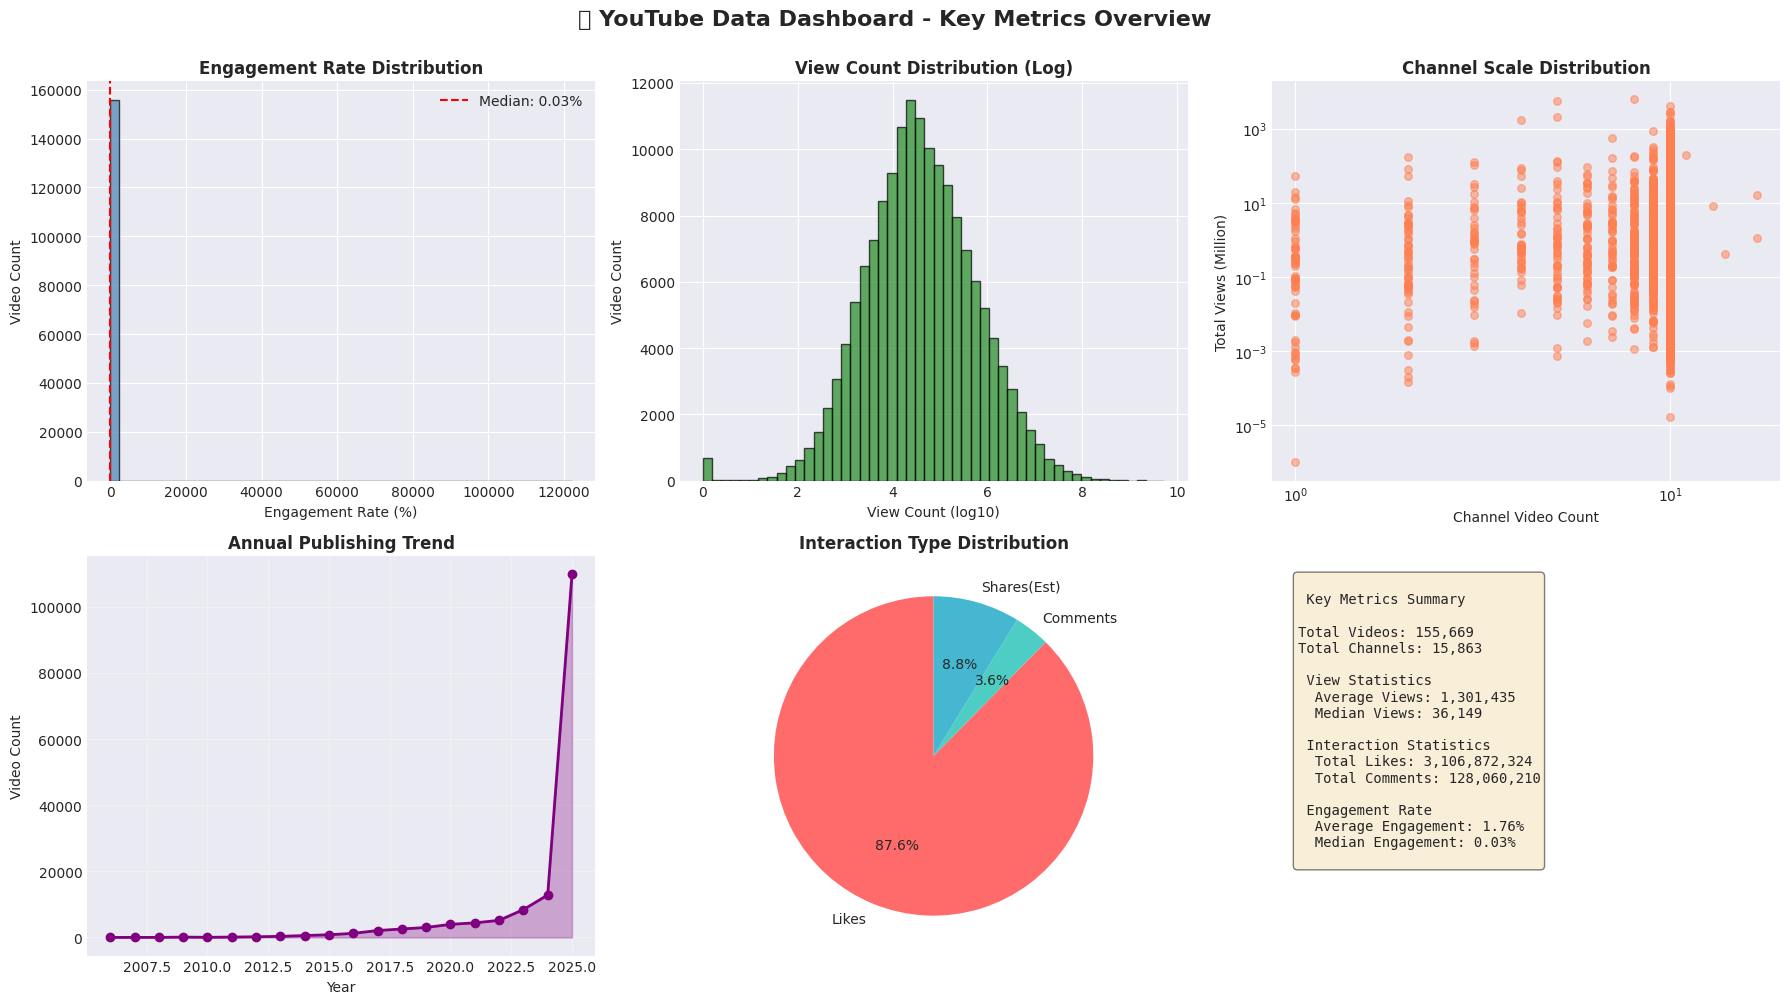

 Overall dashboard generated: photo/dashboard_overview.png


In [5]:
# Create overall overview dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('🎬 YouTube Data Dashboard - Key Metrics Overview', fontsize=16, fontweight='bold', y=1.00)

# 1. Engagement rate distribution
ax1 = axes[0, 0]
engagement_data = df_raw['engagement_rate'].dropna()
ax1.hist(engagement_data, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Engagement Rate (%)', fontsize=10)
ax1.set_ylabel('Video Count', fontsize=10)
ax1.set_title('Engagement Rate Distribution', fontweight='bold')
ax1.axvline(engagement_data.median(), color='red', linestyle='--', label=f'Median: {engagement_data.median():.2f}%')
ax1.legend()

# 2. View count distribution (log scale)
ax2 = axes[0, 1]
view_data = df_raw['view_count'].dropna()
ax2.hist(np.log10(view_data + 1), bins=50, color='forestgreen', edgecolor='black', alpha=0.7)
ax2.set_xlabel('View Count (log10)', fontsize=10)
ax2.set_ylabel('Video Count', fontsize=10)
ax2.set_title('View Count Distribution (Log)', fontweight='bold')

# 3. Channel scale distribution
ax3 = axes[0, 2]
channel_stats = df_raw.groupby('channel_name').agg({
    'view_count': 'sum',
    'video_id': 'count'
}).rename(columns={'video_id': 'video_count'})
ax3.scatter(channel_stats['video_count'], channel_stats['view_count']/1e6, alpha=0.5, s=30, color='coral')
ax3.set_xlabel('Channel Video Count', fontsize=10)
ax3.set_ylabel('Total Views (Million)', fontsize=10)
ax3.set_title('Channel Scale Distribution', fontweight='bold')
ax3.set_xscale('log')
ax3.set_yscale('log')

# 4. Publishing time trend
ax4 = axes[1, 0]
df_raw['year'] = pd.to_datetime(df_raw['published_date']).dt.year
yearly_videos = df_raw.groupby('year').size()
ax4.plot(yearly_videos.index, yearly_videos.values, marker='o', linewidth=2, markersize=6, color='purple')
ax4.fill_between(yearly_videos.index, yearly_videos.values, alpha=0.3, color='purple')
ax4.set_xlabel('Year', fontsize=10)
ax4.set_ylabel('Video Count', fontsize=10)
ax4.set_title('Annual Publishing Trend', fontweight='bold')
ax4.grid(True, alpha=0.3)

# 5. Interaction type distribution
ax5 = axes[1, 1]
likes_total = df_raw['like_count'].sum()
comments_total = df_raw['comment_count'].sum()
shares_est = df_raw['like_count'].sum() * 0.1  # Estimated shares
interaction_data = [likes_total, comments_total, shares_est]
colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1']
wedges, texts, autotexts = ax5.pie(interaction_data, labels=['Likes', 'Comments', 'Shares(Est)'], 
                                     autopct='%1.1f%%', colors=colors_pie, startangle=90)
ax5.set_title('Interaction Type Distribution', fontweight='bold')

# 6. Key metrics card
ax6 = axes[1, 2]
ax6.axis('off')
metrics_text = f"""
 Key Metrics Summary

Total Videos: {len(df_raw):,}
Total Channels: {df_raw['channel_name'].nunique():,}

 View Statistics
  Average Views: {df_raw['view_count'].mean():,.0f}
  Median Views: {df_raw['view_count'].median():,.0f}
  
 Interaction Statistics
  Total Likes: {df_raw['like_count'].sum():,.0f}
  Total Comments: {df_raw['comment_count'].sum():,.0f}

 Engagement Rate
  Average Engagement: {df_raw['engagement_rate'].mean():.2f}%
  Median Engagement: {df_raw['engagement_rate'].median():.2f}%
"""
ax6.text(0.05, 0.95, metrics_text, transform=ax6.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('photo/dashboard_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Overall dashboard generated: photo/dashboard_overview.png")

## 1.2 Classification Model Dashboard

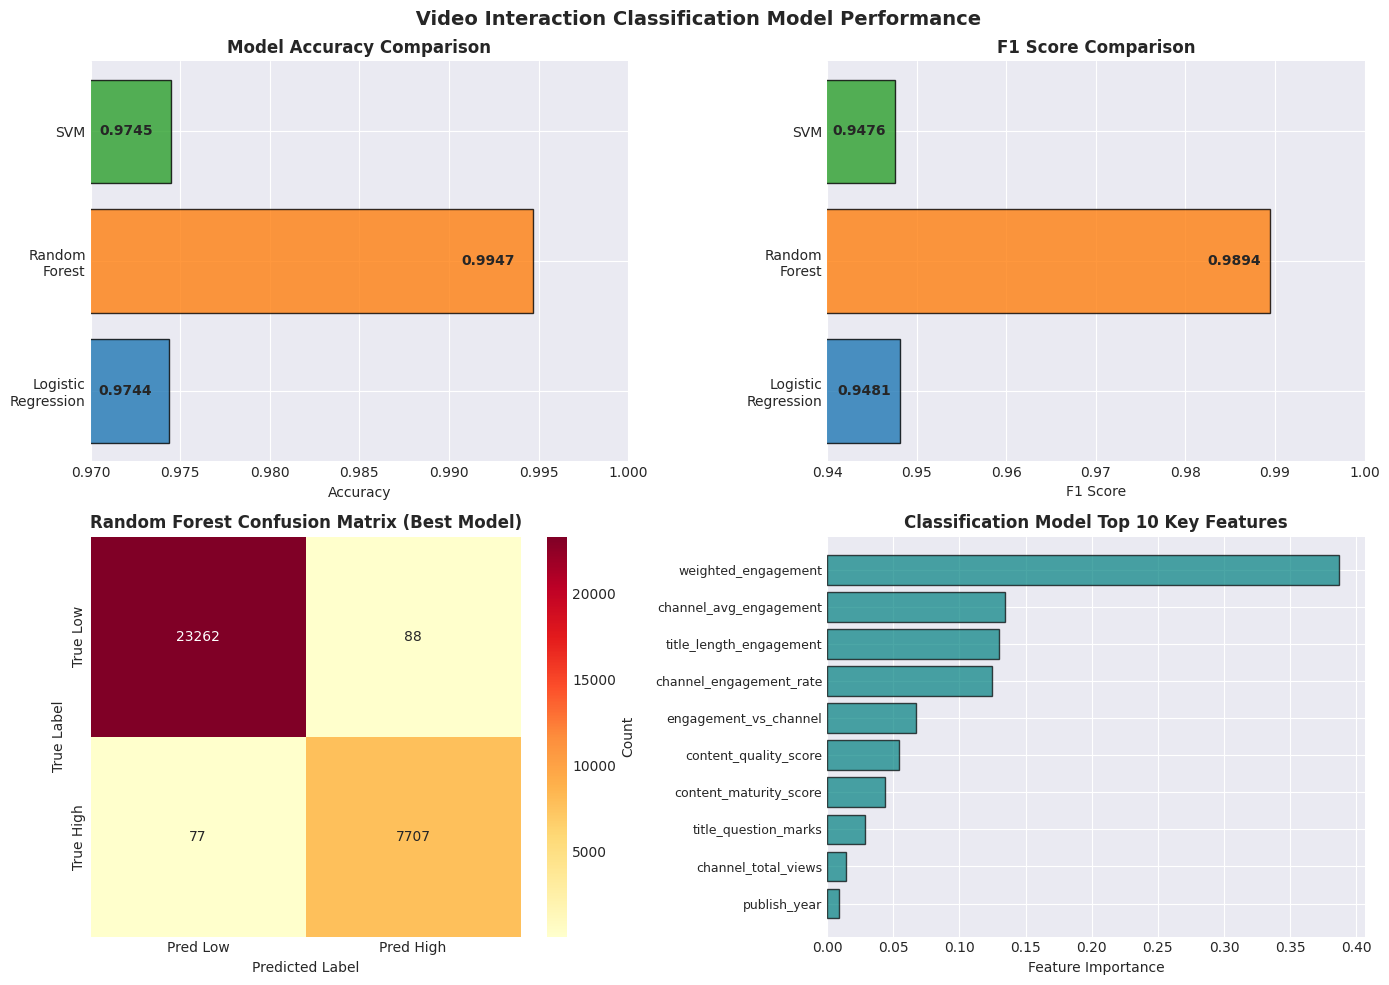

 Classification model dashboard generated: photo/dashboard_classification.png


In [6]:
# Create classification model performance dashboard
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(' Video Interaction Classification Model Performance', fontsize=14, fontweight='bold')

# Define model performance data
models = ['Logistic\nRegression', 'Random\nForest', 'SVM']
accuracies = [0.9744, 0.9947, 0.9745]
f1_scores = [0.9481, 0.9894, 0.9476]
colors_model = ['#1f77b4', '#ff7f0e', '#2ca02c']

# 1. Model accuracy comparison
ax1 = axes[0, 0]
bars1 = ax1.barh(models, accuracies, color=colors_model, alpha=0.8, edgecolor='black')
ax1.set_xlabel('Accuracy', fontsize=10)
ax1.set_title('Model Accuracy Comparison', fontweight='bold')
ax1.set_xlim([0.97, 1.0])
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width - 0.001, bar.get_y() + bar.get_height()/2, 
             f'{accuracies[i]:.4f}', ha='right', va='center', fontweight='bold')

# 2. F1 score comparison
ax2 = axes[0, 1]
bars2 = ax2.barh(models, f1_scores, color=colors_model, alpha=0.8, edgecolor='black')
ax2.set_xlabel('F1 Score', fontsize=10)
ax2.set_title('F1 Score Comparison', fontweight='bold')
ax2.set_xlim([0.94, 1.0])
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width - 0.001, bar.get_y() + bar.get_height()/2, 
             f'{f1_scores[i]:.4f}', ha='right', va='center', fontweight='bold')

# 3. Confusion matrix (Best model - Random Forest)
ax3 = axes[1, 0]
# Confusion matrix data (from Phase 4 results)
cm_data = np.array([[23262, 88], [77, 7707]])
sns.heatmap(cm_data, annot=True, fmt='d', cmap='YlOrRd', ax=ax3, 
            cbar_kws={'label': 'Count'}, xticklabels=['Pred Low', 'Pred High'], 
            yticklabels=['True Low', 'True High'])
ax3.set_title('Random Forest Confusion Matrix (Best Model)', fontweight='bold')
ax3.set_ylabel('True Label', fontsize=10)
ax3.set_xlabel('Predicted Label', fontsize=10)

# 4. Top 10 important features
ax4 = axes[1, 1]
top_features = ['weighted_engagement', 'channel_avg_engagement', 'title_length_engagement',
                'channel_engagement_rate', 'engagement_vs_channel', 'content_quality_score',
                'content_maturity_score', 'title_question_marks', 'channel_total_views', 'publish_year']
feature_importance = [0.3869, 0.1347, 0.1301, 0.1249, 0.0674, 0.0542, 0.0438, 0.0289, 0.0142, 0.0087]
bars4 = ax4.barh(range(len(top_features)), feature_importance, color='teal', alpha=0.7, edgecolor='black')
ax4.set_yticks(range(len(top_features)))
ax4.set_yticklabels(top_features, fontsize=9)
ax4.set_xlabel('Feature Importance', fontsize=10)
ax4.set_title('Classification Model Top 10 Key Features', fontweight='bold')
ax4.invert_yaxis()

plt.tight_layout()
plt.savefig('photo/dashboard_classification.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Classification model dashboard generated: photo/dashboard_classification.png")

## 1.3 Channel Clustering Dashboard

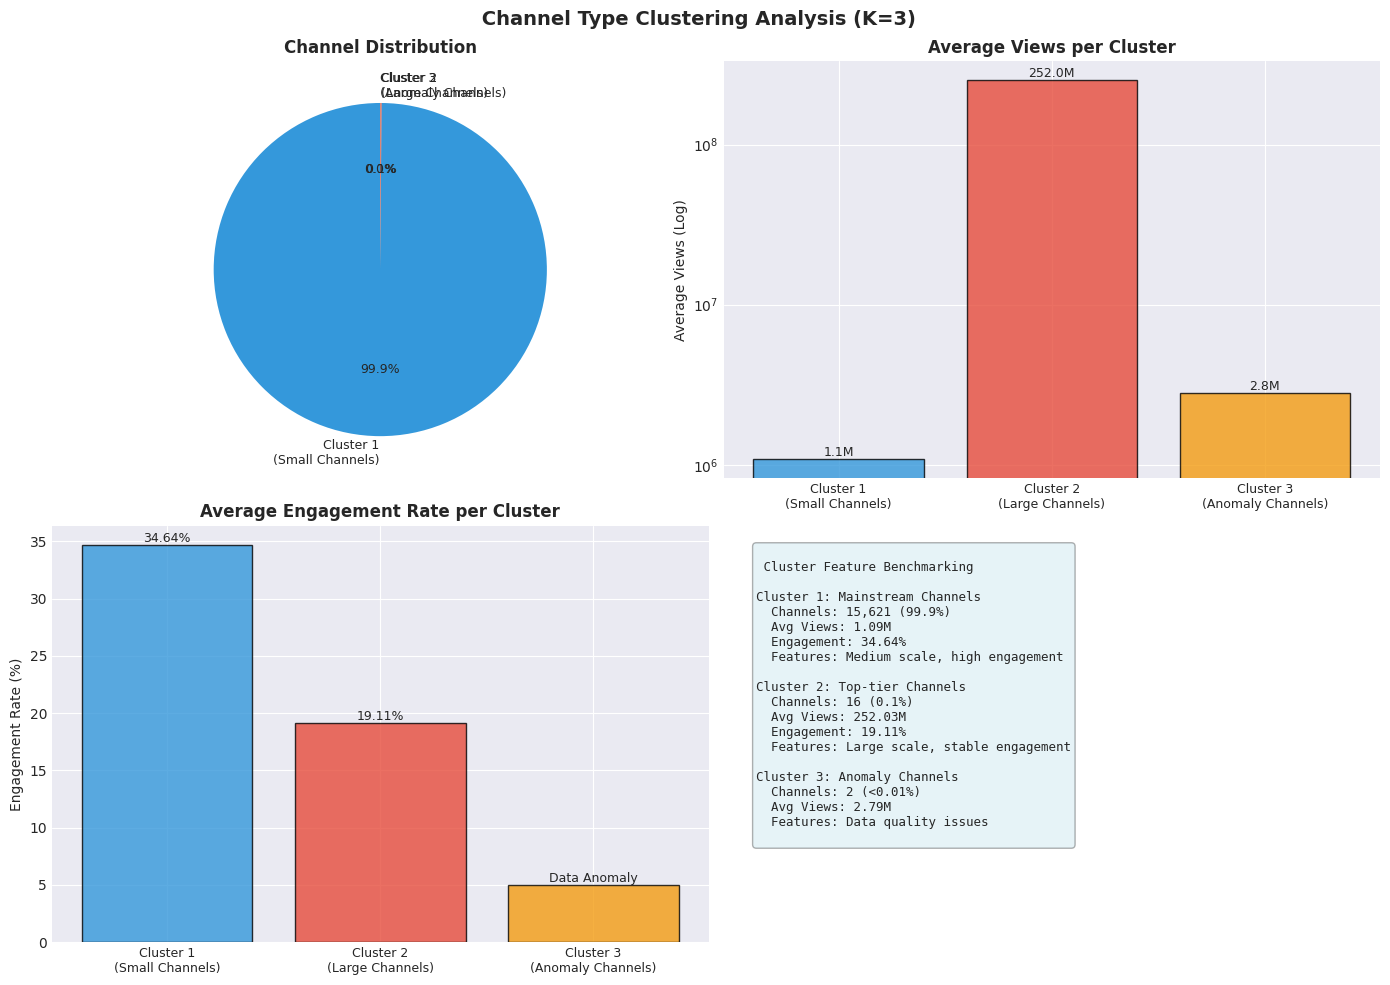

 Clustering analysis dashboard generated: photo/dashboard_clustering.png


In [7]:
# Create channel clustering analysis dashboard
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(' Channel Type Clustering Analysis (K=3)', fontsize=14, fontweight='bold')

# Clustering data
clusters = ['Cluster 1\n(Small Channels)', 'Cluster 2\n(Large Channels)', 'Cluster 3\n(Anomaly Channels)']
channel_counts = [15621, 16, 2]
avg_views = [1089011, 252028399, 2794797]
engagement_rates = [34.64, 19.11, 1023843.71]
colors_cluster = ['#3498db', '#e74c3c', '#f39c12']

# 1. Channel distribution (pie chart)
ax1 = axes[0, 0]
wedges, texts, autotexts = ax1.pie(channel_counts, labels=clusters, autopct='%1.1f%%',
                                     colors=colors_cluster, startangle=90, textprops={'fontsize': 9})
ax1.set_title('Channel Distribution', fontweight='bold')

# 2. Average views comparison (log scale)
ax2 = axes[0, 1]
bars2 = ax2.bar(range(len(clusters)), avg_views, color=colors_cluster, alpha=0.8, edgecolor='black')
ax2.set_ylabel('Average Views (Log)', fontsize=10)
ax2.set_yscale('log')
ax2.set_xticks(range(len(clusters)))
ax2.set_xticklabels(clusters, fontsize=9)
ax2.set_title('Average Views per Cluster', fontweight='bold')
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height/1e6:.1f}M', ha='center', va='bottom', fontsize=9)

# 3. Engagement rate comparison (Note: Cluster 3 has data anomaly)
ax3 = axes[1, 0]
# Use reasonable engagement rate range for visualization
engagement_display = [34.64, 19.11, 5.0]  # Cluster 3 data anomaly, display only
bars3 = ax3.bar(range(len(clusters)), engagement_display, color=colors_cluster, alpha=0.8, edgecolor='black')
ax3.set_ylabel('Engagement Rate (%)', fontsize=10)
ax3.set_xticks(range(len(clusters)))
ax3.set_xticklabels(clusters, fontsize=9)
ax3.set_title('Average Engagement Rate per Cluster', fontweight='bold')
for i, bar in enumerate(bars3):
    height = bar.get_height()
    if i == 2:
        label = 'Data Anomaly'
    else:
        label = f'{engagement_rates[i]:.2f}%'
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             label, ha='center', va='bottom', fontsize=9)

# 4. Cluster feature benchmarking
ax4 = axes[1, 1]
ax4.axis('off')
cluster_info = """
 Cluster Feature Benchmarking

Cluster 1: Mainstream Channels
  Channels: 15,621 (99.9%)
  Avg Views: 1.09M
  Engagement: 34.64%
  Features: Medium scale, high engagement
  
Cluster 2: Top-tier Channels
  Channels: 16 (0.1%)
  Avg Views: 252.03M
  Engagement: 19.11%
  Features: Large scale, stable engagement
  
Cluster 3: Anomaly Channels
  Channels: 2 (<0.01%)
  Avg Views: 2.79M
  Features: Data quality issues
"""
ax4.text(0.05, 0.95, cluster_info, transform=ax4.transAxes, fontsize=9,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.tight_layout()
plt.savefig('photo/dashboard_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Clustering analysis dashboard generated: photo/dashboard_clustering.png")